In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin


In [78]:

df = pd.read_csv('Mall_Customers.csv')

In [79]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Print the shape of X
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [80]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Print the shape and few samples of scaled data
print(X_scaled.shape)
print(X_scaled[:5]) 

(200, 2)
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [81]:
df_before = df
df_after = df
df_before[['standardized income', 'standardized spending']] = X_scaled
df_after[['standardized income', 'standardized spending']] = X_scaled
df_before[:10]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),standardized income,standardized spending
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980
5,6,Female,22,17,76,-1.662660,1.001596
6,7,Female,35,18,6,-1.624491,-1.715913
7,8,Female,23,18,94,-1.624491,1.700384
8,9,Male,64,19,3,-1.586321,-1.832378
9,10,Female,30,19,72,-1.586321,0.846310


In [82]:
def kmeans(X, k, max_iters=100):
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]
    labels = pairwise_distances_argmin(X, centroids)

    before = np.zeros(200)

    for i in range(200):
        before[i] = np.sqrt((X[i, 0] - centroids[labels[i], 0])**2 + (X[i, 1] - centroids[labels[i], 1])**2)

    print("Initial centroids:\n", centroids)

    df_before['cluster'] = labels  
    df_before['distance from cluster centroid'] = before

    for i in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break  # this means no more convergence, hence stop the algorithm

        centroids = new_centroids

    return centroids, labels

# Run the K-Means algorithm
centroids, labels = kmeans(X_scaled, 5)

# Print the final centroids
print("Final centroids:\n", centroids)

new = np.zeros(200)

for i in range(200):
    new[i] = np.sqrt((X[i, 0] - centroids[labels[i], 0])**2 + (X[i, 1] - centroids[labels[i], 1])**2)

new  

df_after['cluster'] = labels  
df_after['distance from cluster centroid'] = new

from tabulate import tabulate

print('Before algorithm:')
print(tabulate(df_before.head(10), headers='keys', tablefmt='pretty'))  # Display df_before in table format

print('\nAfter algorithm:')
print(tabulate(df_after.head(10), headers='keys', tablefmt='pretty')) 

Initial centroids:
 [[ 1.61991057 -1.05594645]
 [-0.25039146 -0.08540743]
 [ 1.00919971 -0.90066021]
 [ 0.66567484  1.54509812]
 [-1.73899919 -0.43480148]]
Final centroids:
 [[ 1.87564575 -1.09476801]
 [-0.46948398  0.2437994 ]
 [ 0.69975469 -1.272238  ]
 [ 0.99158305  1.23950275]
 [-1.30751869 -1.13696536]]
Before algorithm:
+---+------------+--------+-----+--------------------+------------------------+---------------------+-----------------------+---------+--------------------------------+
|   | CustomerID | Genre  | Age | Annual Income (k$) | Spending Score (1-100) | standardized income | standardized spending | cluster | distance from cluster centroid |
+---+------------+--------+-----+--------------------+------------------------+---------------------+-----------------------+---------+--------------------------------+
| 0 |     1      |  Male  | 19  |         15         |           39           | -1.7389991930659485 | -0.43480147996914814  |    4    |       43.323332676143906     

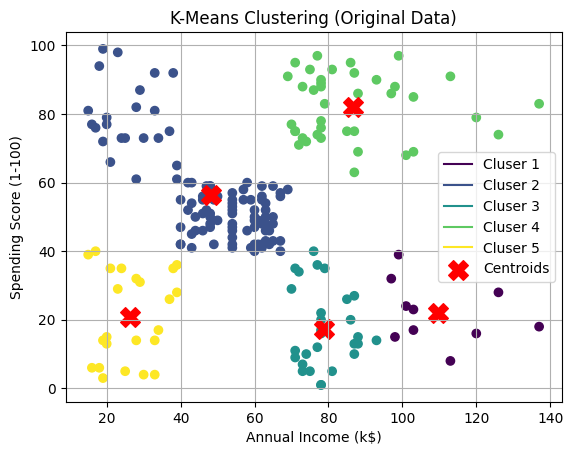

<Figure size 640x480 with 0 Axes>

In [83]:
cmap = plt.get_cmap('viridis', 5)

for i in range(5):
    color = cmap(i)
    plt.plot([], [], color=color, label=f'Cluser {i+1}')
    
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
centroid_original = scaler.inverse_transform(centroids)  # Inverse transform centroids for original scale
plt.scatter(centroid_original[:, 0], centroid_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('results.png', format="png")

In [84]:
def predict_cluster(input_data, centroids, scaler):
    input_array = np.array([input_data])
    input_standardized = scaler.transform(input_array)  # Standardize the input
    distances = np.linalg.norm(input_standardized - centroids, axis=1)
    return np.argmin(distances)

# Random input for prediction
random_input = [25, 50]  #Annual Income = 25k$, Spending Score = 50
predicted_cluster = predict_cluster(random_input, centroids, scaler)

print(f'Random input: {random_input} -> Predicted cluster: {predicted_cluster}')

Random input: [25, 50] -> Predicted cluster: 1
